In [1]:
%matplotlib inline  
import numpy as np 
import pandas as pd 
import pylab as pl 
import datetime as dt 
import os 
from pandas import DataFrame
import MySQLdb
import json
import hidrologia
import warnings
warnings.filterwarnings('ignore')
import scipy.signal
from datetime import timedelta
from datetime import datetime
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.patches as mpatches
import textwrap
import matplotlib.patches as mpatches
import pymysql
import pylab as pl
%matplotlib inline

#COLOR EDGES
pl.rc('axes',labelcolor='#4f4f4f')
pl.rc('axes',linewidth=1.5)
pl.rc('axes',edgecolor='#bdb9b6')
pl.rc('text',color= '#4f4f4f')

# COSAS PA CORRER EN PLANTILLA.
# fuente
import matplotlib 
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
import matplotlib.font_manager as font_manager
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_dirs = ['/home/malvarezm/jupyter/git/SIATA_hidrologia/hidrologia/AvenirLTStd-Book']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_path = font_files[0]
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'Avenir LT Std'
matplotlib.rcParams['font.size']=14
import matplotlib.style as style 

Timestamp('2014-03-10 00:00:01')
Timestamp('2014-03-10 00:00:01')
Timestamp('2014-03-10 00:00:01')
      nr1  nr2   nr3   nr4  offset
108  0.95  1.4  1.65  2.77    3.77
95.0 140.0 165.0 377.0


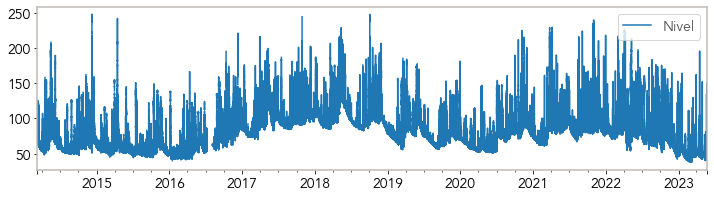

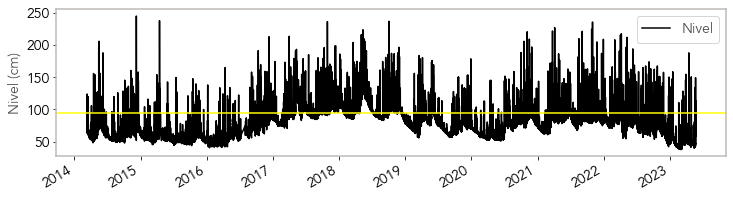

In [10]:
#Codigos=[101,106,124,134,169,182,236,238,272,284,333,382,402,91,93,94,99,109,]
#Codigos = [143, 554, 109, 405, 145, 562, 406, 431] #Codigo estacion a actualizar.
Codigos = [108,]
##ESTACIONES A CONSULTAR
for Codigo in Codigos:
    host = '192.168.1.100'
    user = 'siata_Consulta'
    passwd = 'si@t@64512_C0nsult4'
    dbname = 'siata'

    metadatos = "select nombreestacion, fechainstalacion, longitude, latitude from estaciones where codigo="+str(Codigo)
    db = MySQLdb.connect(host, user, passwd, dbname)
    db_cursor = db.cursor()
    db_cursor.execute(metadatos)
    data = db_cursor.fetchall()
    fecha_ini=data[0][1].strftime('%Y-%m-%d %H:%M')
    #fecha_ini='2022-01-01 00:00:00'
    fecha_fin='2023-05-23 23:59:59'
    Serie_Hd = hidrologia.nivel.consulta_nivel(str(Codigo),fecha_ini,fecha_fin,'192.168.1.100','siata_Consulta', 'si@t@64512_C0nsult4', 'siata', retorna_niveles_riesgo=True)
    NR = Serie_Hd[0]
    print(NR)
    Amarillo = NR.iloc[0][0]*100
    Naranja  = NR.iloc[0][1]*100
    Rojo  = NR.iloc[0][2]*100
    Verde  = NR.iloc[0][3]*100
    offset = NR.iloc[0][4]*100
    print(Amarillo, Naranja , Rojo, offset)
    Serie_Hdd = Serie_Hd[1].astype(float).resample('1T').max()
#Serie_Hdd = Serie.astype(float).resample('5T').max()

    Serie_Hdd.index = pd.to_datetime(Serie_Hdd.index)
    Serie_Hdx = pd.DataFrame(Serie_Hdd.iloc[:,0]) #para columnas repetidas
    Serie_Hdx = Serie_Hdx*100
    Serie_Hdx.columns= ['Nivel']
    Serie_Hdx.plot(figsize=(12,3))

    Serie_Hd2 = Serie_Hdx.resample('5T').mean()
    Serie_Hd2 = Serie_Hd2.dropna()
    Serie_Hd2.plot(figsize=(12,3), color='k', label='Level') #
    #plt.axhline(Rojo, c='red')
    #plt.axhline(Naranja, c='orange')
    plt.axhline(Amarillo, c='yellow')
    
    #plt.fill_between(np.arange(0, len(Serie_Hd2.values),1), 0, Amarillo, color='green', alpha=0.3)
    
    plt.ylabel('Nivel (cm)')
    #plt.title('Historic time serie')
    maximos = scipy.signal.find_peaks(Serie_Hd2['Nivel'],Amarillo,distance = 36)[0] #Eventos a partir del Amarillo
    Evs2 =  pd.Series(Serie_Hd2.iloc[maximos].bool, index= Serie_Hd2.index[maximos])
    Fechas = Serie_Hd2.index[maximos]
    Serie_Hd2.iloc[maximos].to_csv('/home/malvarezm/jupyter/Pronostico/Serie_{}.csv'.format(Codigo)) ##GUARDA SERIE DE MAXIMOS
    

Text(0, 0.5, 'Nivel (cm)')

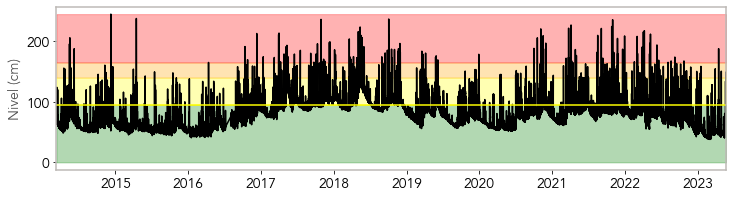

In [11]:
Serie_Hd2 = Serie_Hdx.resample('5T').mean()
Serie_Hd2 = Serie_Hd2.dropna()
plt.figure(figsize=(12,3))
plt.plot(Serie_Hd2, color='k', label='Level') #
#plt.axhline(Rojo, c='red')
#plt.axhline(Naranja, c='orange')
plt.axhline(Amarillo, c='yellow')

plt.fill_between(Serie_Hd2.index, 0, Amarillo, color='green', alpha=0.3)
plt.fill_between(Serie_Hd2.index, Amarillo, Naranja, color='yellow', alpha=0.3)
plt.fill_between(Serie_Hd2.index,Naranja, Rojo, color='orange', alpha=0.3)
plt.fill_between(Serie_Hd2.index,Rojo, np.nanmax(Serie_Hd2.values), color='red', alpha=0.3)
#plt.ylim(0, 200)
plt.xlim(Serie_Hd2.index[0], Serie_Hd2.index[-1])
plt.ylabel('Nivel (cm)')
#plt.title('Historic time serie')

In [12]:
datos=pd.read_csv('/var/datos_hidrologia/Historicos/HistoricosNivel/historico_108.csv')

<AxesSubplot:>

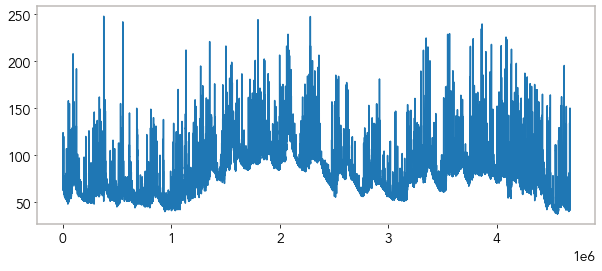

In [18]:
plt.figure(figsize=(10, 4))
datos['nivel'].plot()